In [774]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [775]:
X = pd.read_csv('data_assignment3.csv')
phi = X['phi']
psi = X['psi']




# 1b


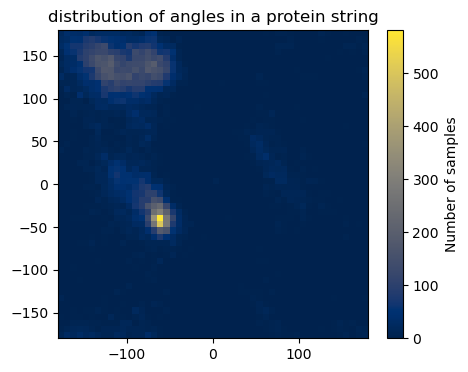

In [776]:
# Set size of the figure
plt.figure(figsize=(5, 4))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(phi, psi, bins=50, cmap='cividis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('distribution of angles in a protein string')

# Show the plot.
plt.show()

# 1c


In [777]:
print(X)

      residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]


In [778]:
xPhi = phi.tolist()
xPsi = psi.tolist()
phiPlus = X['phi'].tolist()
psiPlus = X['psi'].tolist()
res = X['residue name'].tolist()
pos = X['position'].tolist()
chain = X['chain'].tolist()

for i in range(len(phiPlus)):
    phiPlus[i] += 360
    psiPlus[i] += 360

#create dataframes for all four quadrants
topLeftDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phi, 'psi': psiPlus})
topRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psiPlus})

bottomRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psi})
bottomLeftDF = X
# merge all the dataframes
X4 = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


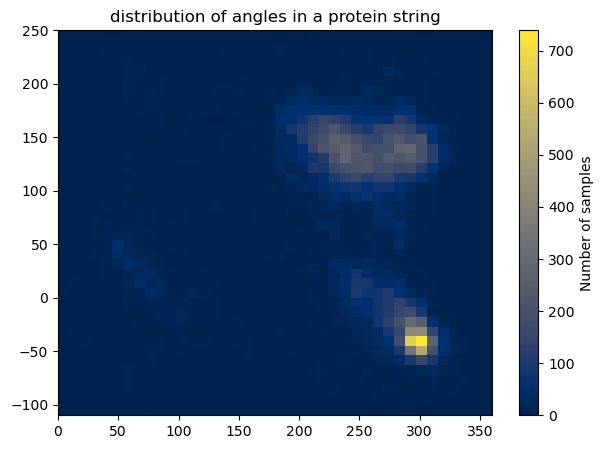

In [779]:
# Set size of the figure
plt.figure(figsize=(7,5))
# Plot 2D histogram from X
# We can choose different colormaps (i.e., viridis, plasma, inferno, magma, cividis).
plt.hist2d(X4['phi'], X4['psi'], bins=80, cmap='cividis')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of samples')

# Add title and labels to plot.

plt.title('distribution of angles in a protein string')

# Show the plot.
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

# 2a


In [780]:
del X4['residue name']
del X4['position']
del X4['chain']
X4

,phi,psi
0,210.687145,142.657714
1,315.716790,136.002076
2,240.027379,-168.705263
3,224.682788,137.143523
4,255.148533,95.928520
...,...,...
117471,212.250443,515.223562
117472,242.571459,493.019506
117473,246.413552,472.091970
117474,259.331221,347.897179


In [781]:
# Perform K-Means clustering    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=8, random_state=4, n_init = 10).fit(X4)

In [782]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

[[-104.81327449  494.80702137]
 [ 255.03273723  138.00136914]
 [-104.902835    137.37533483]
 [ 255.7753378   494.92800231]
 [ -60.14794407  -33.45695697]
 [ 302.11086065  -34.97538166]
 [ -56.96904975  337.17869936]
 [ 307.61699332  336.10034648]]


In [783]:
print(kmeans.labels_)

[1 1 5 ... 3 7 3]


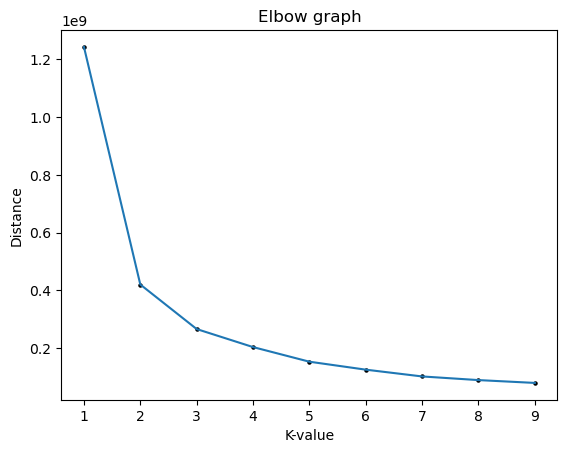

In [784]:
k_values = range (1,10)
tot_dist=[]

# Perform K-Means clustering
# Specify the number of clusters (3) and fit the data X
#k*4 to account for
for k in k_values:
    kmeans = KMeans(n_clusters=k*4, random_state=4, n_init = 10).fit(X4)
    tot_dist.append(kmeans.inertia_)

#Plot elbow graph
plt.title("Elbow graph")
plt.ylabel("Distance")
plt.xlabel("K-value")
plt.scatter(k_values, tot_dist, c='k', s=5)
plt.plot(k_values, tot_dist)
plt.show()


#access.flat

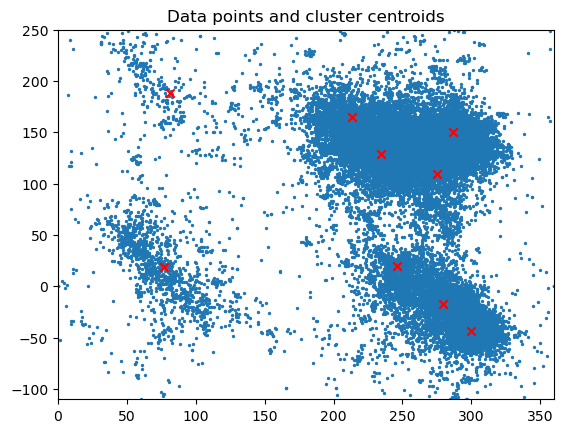

In [785]:
# Plotting the cluster centers and the data points
plt.scatter(X4['phi'], X4['psi'], s=2)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

In [786]:
## Compute DBSCAN
db = DBSCAN(eps=13.5, min_samples=115).fit(X4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=13.5, min_samples=115)
Estimated number of clusters: 18
Estimated number of noise points: 7065


In [787]:
core_samples_mask[db.core_sample_indices_] = True

In [788]:
X4 =X4.to_numpy()

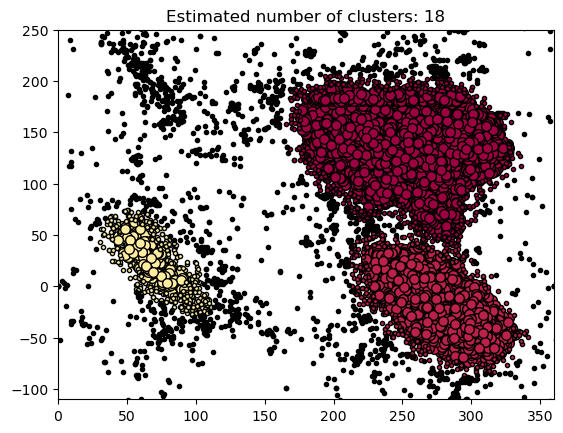

In [789]:
# Plot result
# Black removed and is used for noise instead.

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X4[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = X4[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()

(-110.0, 250.0)

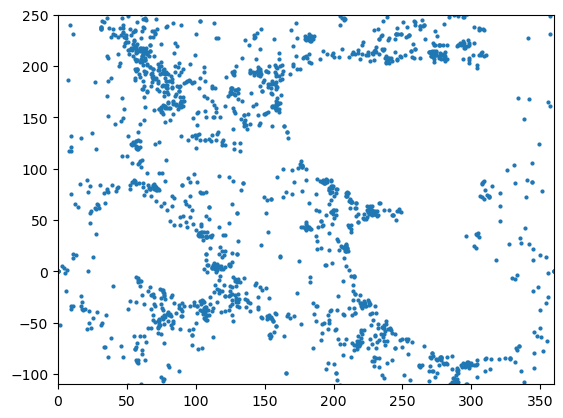

In [790]:
#noise plot

xy = X4[class_member_mask & ~core_samples_mask]

noise =X4[class_member_mask]
plt.scatter(noise[:, 0], noise[:, 1], s=4)
plt.xlim([0, 360]) 
plt.ylim([-110, 250])


In [791]:
xPhi = phi.tolist()
xPsi = psi.tolist()
phiPlus = X['phi'].tolist()
psiPlus = X['psi'].tolist()
res = X['residue name'].tolist()
pos = X['position'].tolist()
chain = X['chain'].tolist()

In [792]:

for i in range(len(phiPlus)):
    phiPlus[i] += 360
    psiPlus[i] += 360

#create dataframes for all four quadrants
topLeftDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phi, 'psi': psiPlus})
topRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psiPlus})

bottomRightDF = pd.DataFrame(data={'residue name': res, 'position': pos, 
                                  'chain': chain, 'phi': phiPlus, 'psi': psi})
bottomLeftDF = X
# merge all the dataframes
X5 = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


In [794]:

phi = X5['phi'].tolist()
psi = X5['psi'].tolist()

X5 = X5[(X5['phi'].isin(noise[:, 0])) & (X5['psi'].isin(noise[:,1]))]


In [717]:
X5 = X5[(X5['phi'] <= 360) & (X5['phi'] >= 0)]
X5 = X5[(X5['psi'] <= 240) & (X5['psi'] >= -120)]


   
X5

,residue name,position,chain,phi,psi
293,GLU,49,C,228.217863,-70.626214
296,GLY,52,C,185.758648,-41.454436
333,GLU,90,C,271.449908,-79.887065
506,VAL,137,D,204.400304,-119.903382
586,GLU,90,E,304.230174,-86.043700
...,...,...,...,...,...
115028,GLY,40,D,258.946062,216.680238
115184,ASP,47,A,227.953852,212.530052
115317,ASP,47,B,228.827862,211.521684
115609,SER,332,C,246.425935,206.498832


In [718]:
len(noise[:, 0].tolist())

7065

In [744]:
res = list(set(X5['residue name']))

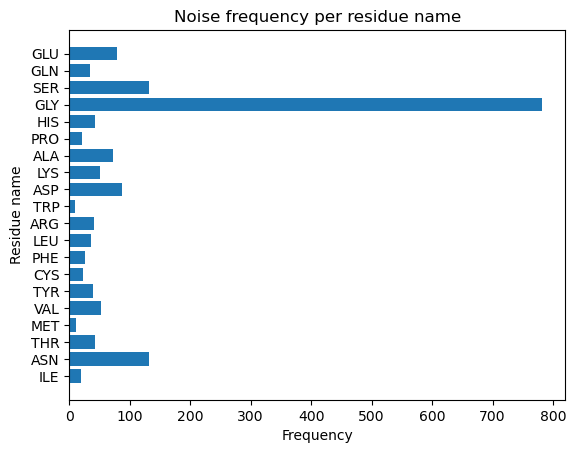

In [755]:
freqNoise = []
for r in res:
    freqNoise.append(len(X5[X5['residue name'] == r]))
objects = tuple(res)
y_pos = np.arange(len(objects))
performance = freqNoise
plt.barh(y_pos, performance, align='center', alpha=1, )
plt.yticks(y_pos, objects)
plt.ylabel('Residue name')
plt.xlabel('Frequency')
plt.title('Noise frequency per residue name')

plt.show()






In [756]:
X = pd.read_csv('data_assignment3.csv')

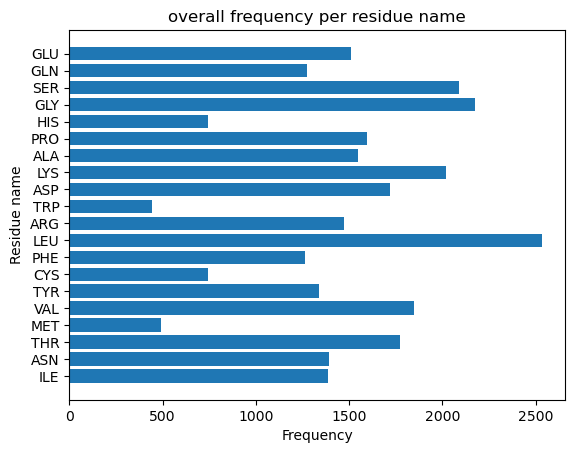

In [751]:
freqTotal = []
for r in res:
    freqTotal.append(len(X[X['residue name'] == r]))
objects = tuple(res)
y_pos = np.arange(len(objects))
performance = freqTotal
plt.barh(y_pos, performance, align='center', alpha=1, )
plt.yticks(y_pos, objects)
plt.ylabel('Residue name')
plt.xlabel('Frequency')
plt.title('overall frequency per residue name')

plt.show()


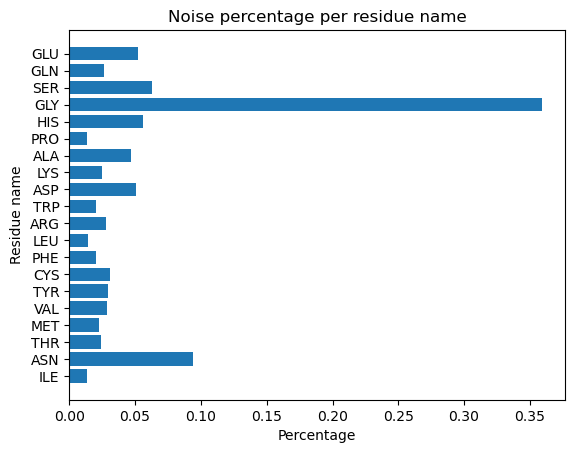

In [759]:
freqNoiseOverTotal = []
for n,t in zip(freqNoise,freqTotal):
    freqNoiseOverTotal.append(n/t)
objects = tuple(res)
y_pos = np.arange(len(objects))
performance = freqNoiseOverTotal
plt.barh(y_pos, performance, align='center', alpha=1, )
plt.yticks(y_pos, objects)
plt.ylabel('Residue name')
plt.xlabel('Percentage')
plt.title('Noise percentage per residue name')

plt.show()


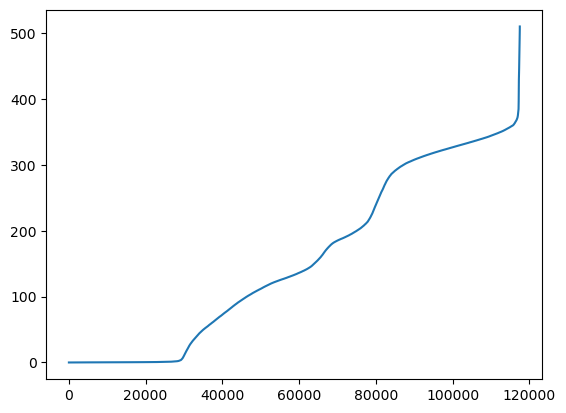

In [703]:
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X4)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


# 3c

# 4

In [800]:

# merge all the dataframes
Xpro = pd.merge(pd.merge(bottomRightDF, bottomLeftDF, how='outer'), pd.merge(topLeftDF, topRightDF,how='outer'),how='outer')


In [856]:
Xpro = Xpro[Xpro['residue name'] == 'PRO']
del Xpro['residue name']
del Xpro['position']
del Xpro['chain']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [853]:
## Compute DBSCAN

db = DBSCAN(eps=6.5, min_samples=10).fit(Xpro)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

DBSCAN(eps=6.5, min_samples=10)
Estimated number of clusters: 16
Estimated number of noise points: 448


In [854]:

Xpro = Xpro.to_numpy()
Xpro

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

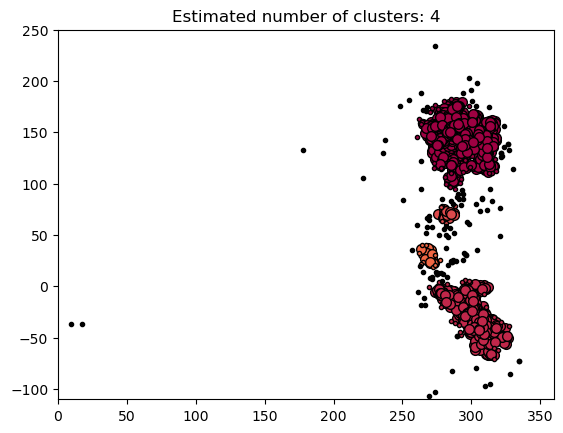

In [855]:
# Plot result
# Black removed and is used for noise instead.

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Xpro[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = Xpro[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % (n_clusters_//4))
plt.xlim([0, 360]) 
plt.ylim([-110, 250])
plt.show()